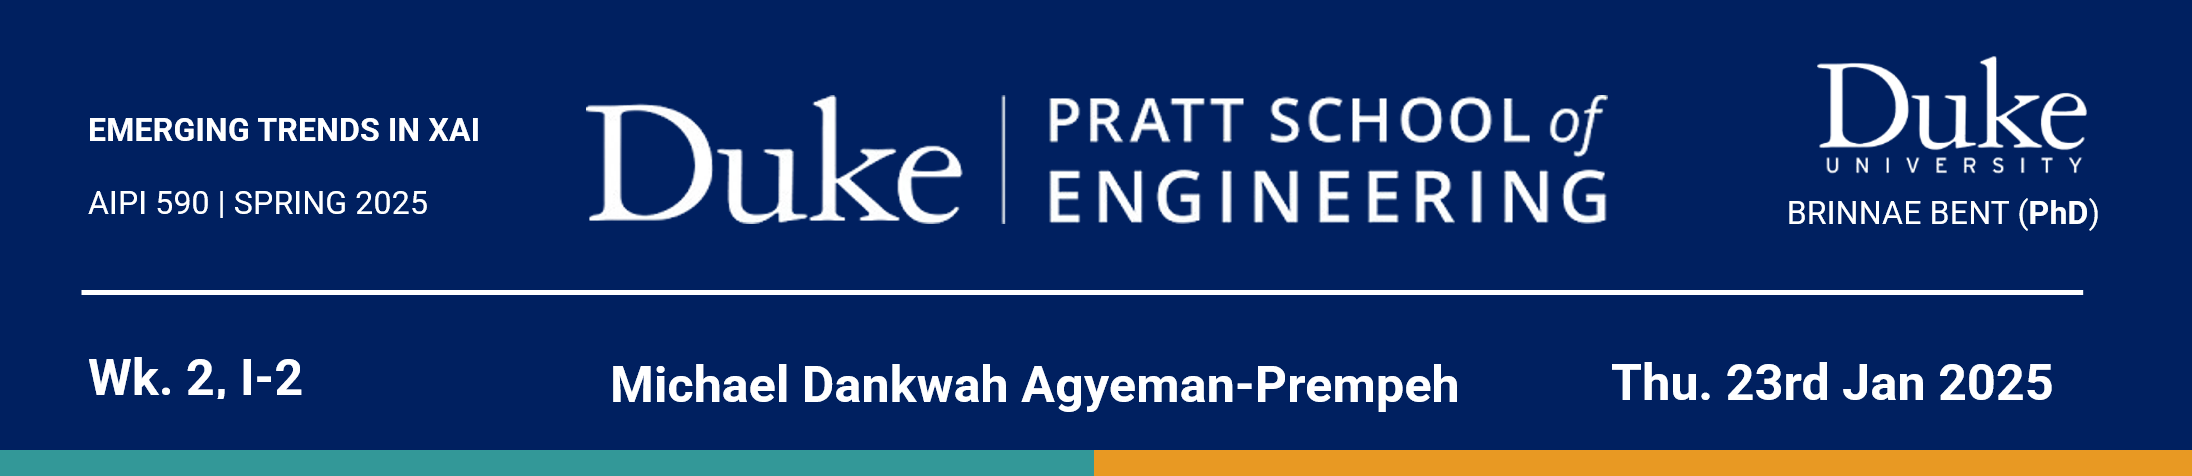
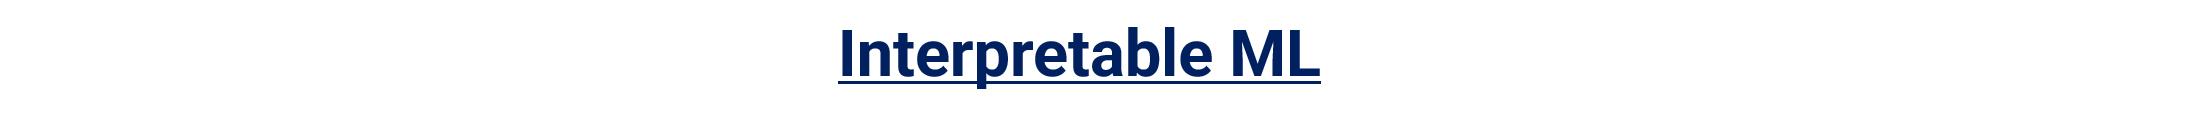

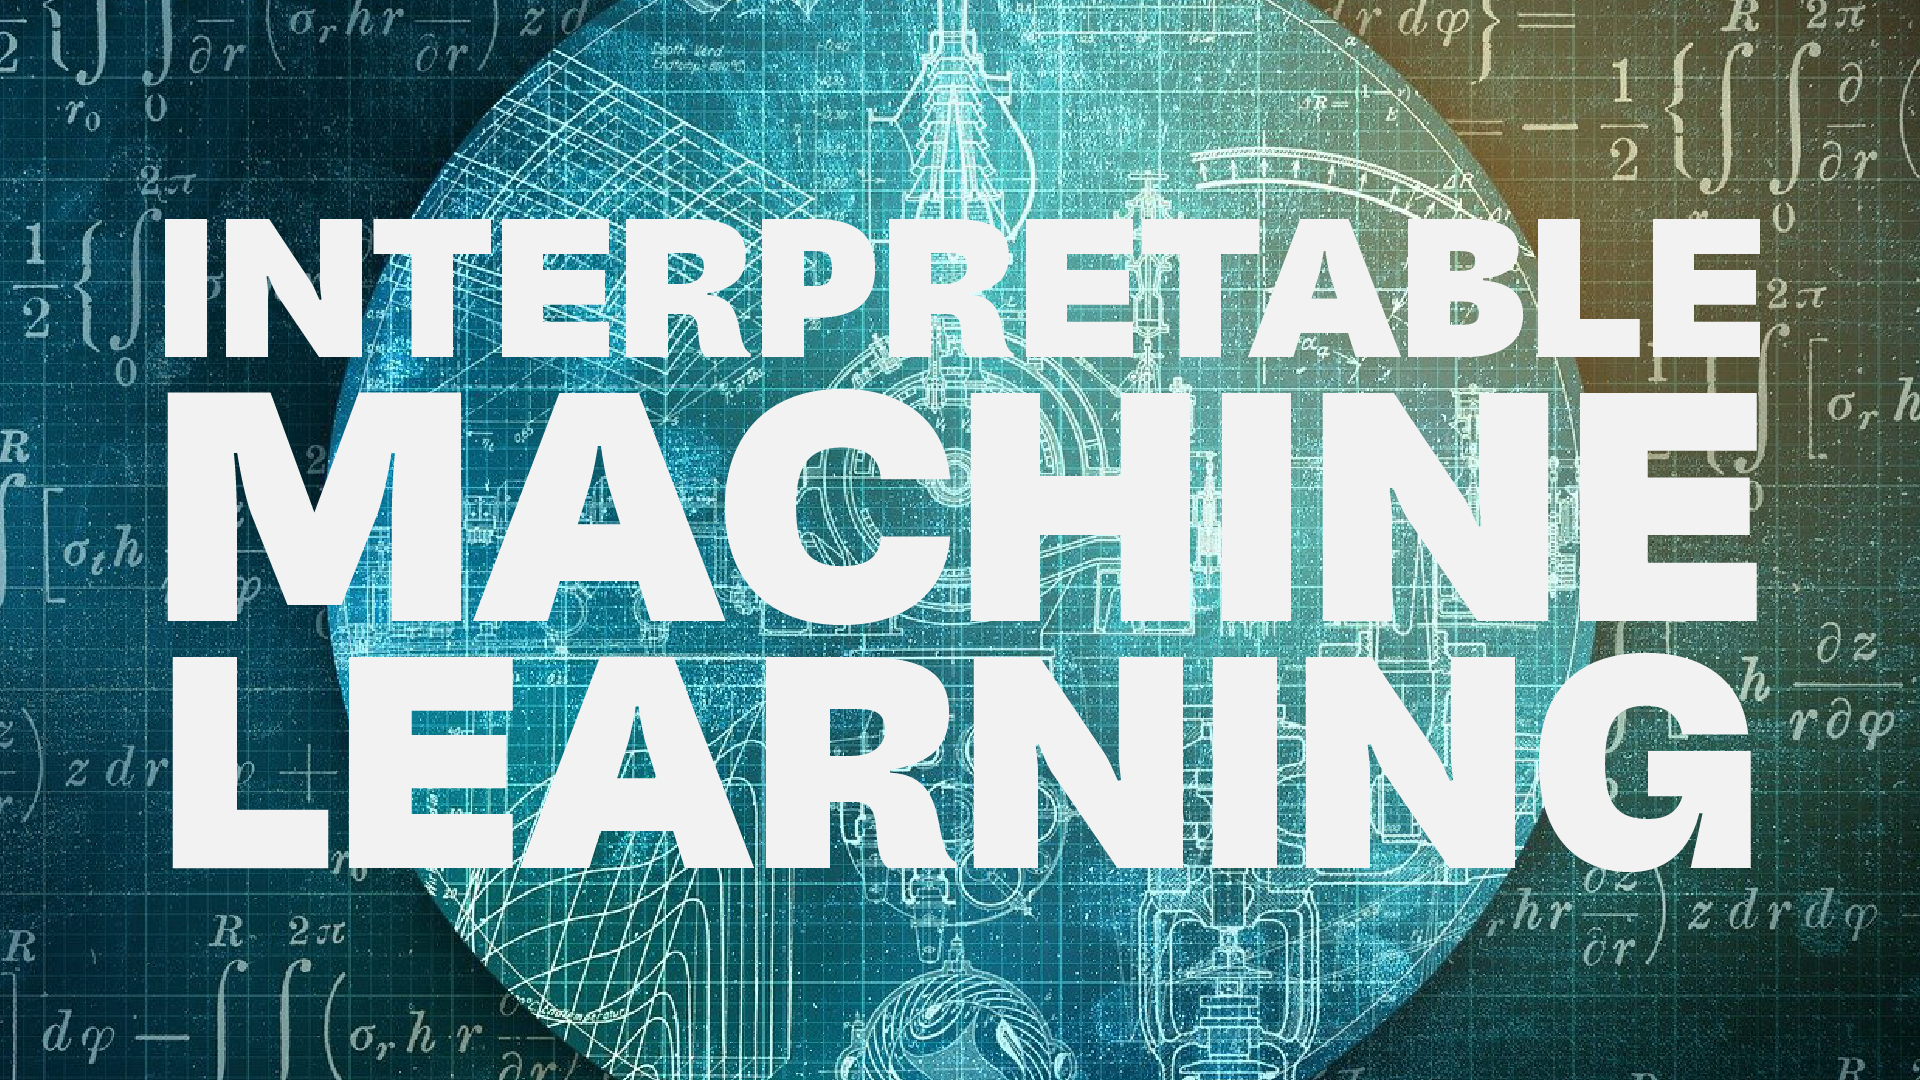

In [ ]:
from IPython.display import Image, display
display(Image(filename='images/iml_img2.jpg', width=1500, height=500))

### **I. Pip Installing Packages Specifically for This Assignment**

In [22]:
!pip install ucimlrepo


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### **II. Importing Essential Libraries for Data Manipulation, Analysis and Visualization**

In [23]:
import pandas as pd
import numpy as np
import scipy as sp
import datetime as dt
from scipy import stats
from operator import attrgetter
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# For Supervised & Unsupervised Learning

from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### **III. Assessing of AirBnB Data**

In [24]:
# Sourcing the 'AirBnB Dataset' to explore and perform some analysis

orig_airbnb_data = pd.read_csv('C:/Users/micha/Desktop/Assign 12/dtk530_i-12/i-12/i-12_datasets/airbnb.csv')

# No of rows
orig_airbnb_data_rows = orig_airbnb_data.shape[0]
# No of columns
orig_airbnb_data_columns = orig_airbnb_data.shape[1]
# Get the values
print(orig_airbnb_data_rows,'\n',orig_airbnb_data_columns)

orig_airbnb_data.info()
# the_airbnb_data.describe()

# Showing first 30 rows of table
orig_airbnb_data.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/micha/Desktop/Assign 12/dtk530_i-12/i-12/i-12_datasets/airbnb.csv'

### **IV. Cleaning of AirBnB Data**

*Cleaning Code sourced from EDA notebook prepared by Ritu from Class 3*


---


From analyzing the Airbnb dataset, the following data cleaning tasks are planned to ensure the data is ready for analysis:

- **[Task 1]** Remove the unnecessary index column named `Unnamed: 0`, which likely originates from exporting the data.
  
- **[Task 2]** Clean the `price` column by stripping dollar signs and commas, then converting the values to `float` for numerical computations.

- **[Task 3]** Fill missing values (`NaNs`) in critical columns:
  - Columns like `number_of_reviews`, `reviews_per_month`, `rating`, `number_of_stays`, and `5_stars` will be filled with `0`, assuming missing values imply no data.
  - Convert the `last_review` column to a datetime format while handling any invalid parsing results.

- **[Task 4]** Convert the `listing_added` column to datetime, enabling time-based operations. Invalid entries will be coerced into `NaT`.

- **[Task 5]** Drop rows where key columns (`name` or `price`) contain missing values to ensure data reliability.

- **[Task 6]** Standardize text fields like `name` and `host_name` by stripping leading and trailing whitespace to maintain consistency.

- **[Task 7]** Rename columns to enhance readability and ensure standardized naming conventions (e.g., `listing_id` → `Listing ID`, `price` → `Price ($)`).

- **[Task 8]** Remove duplicate rows from the dataset to eliminate redundant records.

---

#### **[Task 1]**

In [4]:
# Dropping the 'Unnamed: 0' column, which is likely an unnecessary index column added during data export

the_airbnb_data = orig_airbnb_data.drop(columns=['Unnamed: 0'])

#### **[Task 2]**

In [5]:
# Cleaning the 'price' column by removing dollar signs and commas to convert the column to float for numerical operations

the_airbnb_data['price'] = the_airbnb_data['price'].replace('[\$,]', '', regex=True).astype(float)

#### **[Task 3]**

In [6]:
# Filling missing values (NaNs) in various columns with default values
# - 'number_of_reviews', 'reviews_per_month', 'rating', 'number_of_stays', and '5_stars' are filled with 0, assuming no data means 0.
# - 'last_review' is converted to a datetime format, with errors ignored (i.e., invalid parsing results in NaT).

the_airbnb_data['number_of_reviews'] = the_airbnb_data['number_of_reviews'].fillna(0)
the_airbnb_data['reviews_per_month'] = the_airbnb_data['reviews_per_month'].fillna(0)
the_airbnb_data['rating'] = the_airbnb_data['rating'].fillna(0)
the_airbnb_data['number_of_stays'] = the_airbnb_data['number_of_stays'].fillna(0)
the_airbnb_data['5_stars'] = the_airbnb_data['5_stars'].fillna(0)
the_airbnb_data['last_review'] = pd.to_datetime(the_airbnb_data['last_review'], errors='coerce')

#### **[Task 4]**

In [7]:
# Converting the 'listing_added' column to a datetime format to handle date-based operations, with invalid entries coerced to NaT

the_airbnb_data['listing_added'] = pd.to_datetime(the_airbnb_data['listing_added'], errors='coerce')

#### **[Task 5]**

In [8]:
# Dropping rows where the 'name' or 'price' columns have missing values
# This ensures the dataset contains listings with both a valid name and price

the_airbnb_data = the_airbnb_data.dropna(subset=['name', 'price'])

#### **[Task 6]**

In [9]:
# Stripping leading and trailing whitespace from 'name' and 'host_name' columns
# This ensures consistency and avoids issues caused by unwanted spaces in string fields

the_airbnb_data['name'] = the_airbnb_data['name'].str.strip()
the_airbnb_data['host_name'] = the_airbnb_data['host_name'].str.strip()

#### **[Task 7]**

In [10]:
# Renaming columns to make them more readable and standardized
the_airbnb_data = the_airbnb_data.rename(columns={
    'listing_id': 'Listing ID',
    'name': 'Listing Name',
    'host_id': 'Host ID',
    'host_name': 'Host Name',
    'neighbourhood_full': 'Neighborhood',
    'coordinates': 'Coordinates',
    'room_type': 'Room Type',
    'price': 'Price ($)',
    'number_of_reviews': 'Number of Reviews',
    'last_review': 'Last Review',
    'reviews_per_month': 'Reviews per Month',
    'availability_365': 'Availability (days/year)',
    'rating': 'Rating',
    'number_of_stays': 'Number of Stays',
    '5_stars': '5-Star Rating',
    'listing_added': 'Listing Added'
})

#### **[Task 8]**

In [11]:
the_airbnb_data = the_airbnb_data.drop_duplicates()

Let's assess the cleaned data now!

In [12]:
# the_airbnb_data.describe()
the_airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9763 entries, 0 to 10018
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Listing ID                9763 non-null   int64         
 1   Listing Name              9763 non-null   object        
 2   Host ID                   9763 non-null   int64         
 3   Host Name                 9761 non-null   object        
 4   Neighborhood              9763 non-null   object        
 5   Coordinates               9763 non-null   object        
 6   Room Type                 9763 non-null   object        
 7   Price ($)                 9763 non-null   float64       
 8   Number of Reviews         9763 non-null   int64         
 9   Last Review               7740 non-null   datetime64[ns]
 10  Reviews per Month         9763 non-null   float64       
 11  Availability (days/year)  9763 non-null   int64         
 12  Rating                  

## **1. Running Basic Models of both Supervised & Unsupervised Learning**

### **A. Supervised Learning**

### **Problem 1.1 - Model Development Using Linear Regression**

#### **<mark>Step A</mark> - Features Selection and Justification (*X variable(s)*) with the target, price element (*Y variable*)**

#### **i) The 4 Features:**
##### **1. Number of Reviews**
The **Number of Reviews** immediately stands out as a strong feature for my linear regression model. Intuitively, I'd expect that the more reviews a listing has, the higher the price tends to be. More reviews usually signals that a property is in higher demand and can command premium pricing. 

From a practical standpoint, reviews are also a nice numerical value, so they'll integrate seamlessly into my regression model without any complex data transformations.

##### **2. Rating**
Another key feature I'm really excited about is the **Rating**. A higher rating from guests is a direct signal of quality, and quality listings can justify higher prices. Ratings are measured on a 5-star scale, which translates well to a continuous numeric value that should correlate linearly with price.

Analyzing guest ratings gives me great insight into how the market perceives the value of the listing - this is a critical factor in determining the optimal price point.

##### **3. Availability (days/year)**
The final feature I've selected is **Availability (days/year)**. This metric gives me valuable insights into the supply and demand dynamics at play. Properties with lower availability are likely more exclusive and in-demand, so they can probably charge higher prices.

Similar to the other features, availability is represented as a nice numeric value that I can easily incorporate into my linear regression model. This availability data point rounds out my understanding of the key factors influencing Airbnb listing prices.

##### **4. Reviews per Month**

The Reviews per Month metric stands out as a valuable predictor for my linear regression model. A higher frequency of reviews typically indicates a property's consistent bookings and active rental status, suggesting higher market demand. Like our other features, this numerical value will fit naturally into our regression analysis without requiring complex preprocessing.

#### **ii) Features to Avoid:**
In contrast, I'm intentionally avoiding some other features that are either too complex or don't have a clear linear relationship with the target price variable. For example, the geographic **Coordinates** could get messy to work with, and the **Room Type** would need to be encoded from text into numbers, adding unnecessary complexity.

Additionally, attributes like **Listing ID** or **Listing Added** date don't provide direct insights into how the pricing should work - they're more administrative in nature.


---

#### **<mark>Step B</mark> - Correlation Matrix to Visualize Relationship between Features and Target Variable**

Before we even perform our linear regression, we need to first create a dataframe with the features selected and our target variable, `Price ($)`

In [13]:
# Renaming and tagging the selected features columns to make them understandable for our correlation matrix
# Number of Stay and Room Type's names should be fine
the_airbnb_data = the_airbnb_data.rename(columns={
    'Number of Reviews': 'X1 Property Popularity',
    'Rating': 'X2 Guest Rating',
    'Availability (days/year)': 'X3 Booking Frequency',
    'Reviews per Month': 'X4 Monthly Review Frequency',
    'Price ($)': 'Y Listing Price ($)'
})

In [14]:
# Creating the dataframe with the selected features (X1 - X4) and target variable (Y)
features = ['X1 Property Popularity', 'X2 Guest Rating', 'X3 Booking Frequency', 'X4 Monthly Review Frequency']
target = 'Y Listing Price ($)'
abnb_features_target = the_airbnb_data[features + [target]]


# To get good inference for our data (and achieve some form of linearity), let's drop rows where 'Y Listing Price ($)' is greater than 1000
# The '1000' value can be changed to study the spread of data points on the correlation graph
# Also, this line of code can be commented to get the original spread of the data which has a lot of outliers
abnb_features_target = abnb_features_target[abnb_features_target['Y Listing Price ($)'] <= 1000]


# Calculate the correlation matrix
correlation_matrix = abnb_features_target.corr()

# Display the correlation matrix
correlation_matrix

,X1 Property Popularity,X2 Guest Rating,X3 Booking Frequency,X4 Monthly Review Frequency,Y Listing Price ($)
X1 Property Popularity,1.000000,0.250532,0.168420,0.585432,-0.053524
X2 Guest Rating,0.250532,1.000000,0.022664,0.342333,-0.087048
X3 Booking Frequency,0.168420,0.022664,1.000000,0.163276,0.122142
X4 Monthly Review Frequency,0.585432,0.342333,0.163276,1.000000,-0.049871
Y Listing Price ($),-0.053524,-0.087048,0.122142,-0.049871,1.000000


Let's also check for null values in our new dataframe

In [15]:
# Checking for null values in each column of abnb_features_target dataframe
null_counts = abnb_features_target.isnull().sum()
null_counts

X1 Property Popularity         0
X2 Guest Rating                0
X3 Booking Frequency           0
X4 Monthly Review Frequency    0
Y Listing Price ($)            0
dtype: int64

Now, let's visualize the correlation matrix above

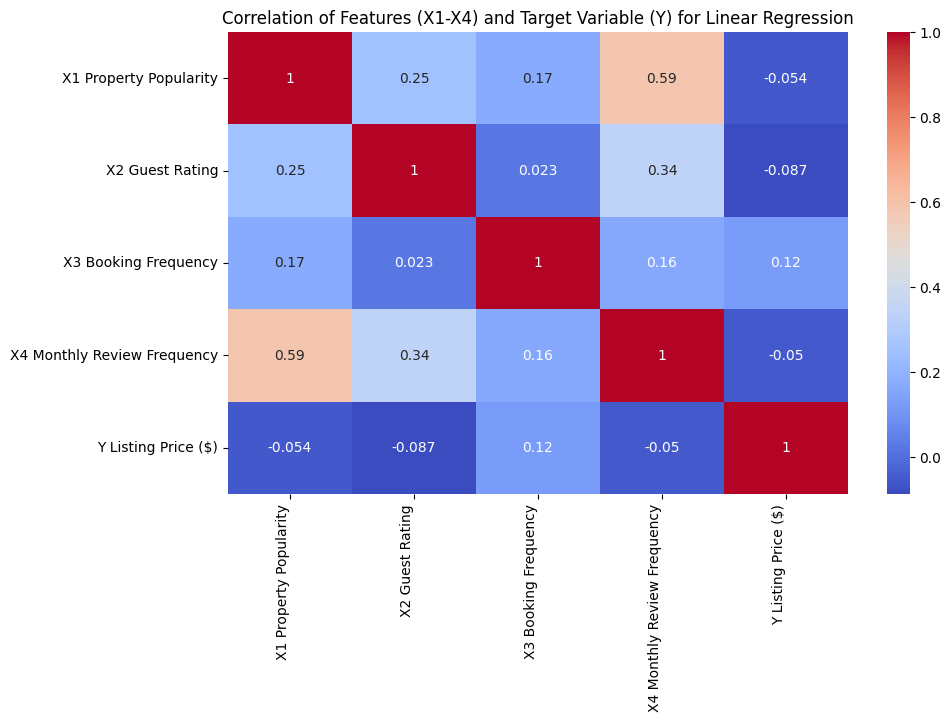

In [16]:
# Using seaborn to create a heat map to visualize the correlation of the features and the target variable, price
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation of Features (X1-X4) and Target Variable (Y) for Linear Regression')
plt.show()

#### **Addressing Removing Weakly Correlated Features & Multicollinearity:**
Since I had to justify the selection of my features (*from the <mark>Step A</mark> section*), there would be no need to comment more on these two items.

---

Let's proceed to apply our linear regression model on our extracted dataset.

#### **<mark>Step C</mark> - Applying the Linear Regression Model**

In [17]:
# Splitting the data into training and testing set
X = abnb_features_target.drop('Y Listing Price ($)', axis=1)
Y = abnb_features_target['Y Listing Price ($)']

X_abnb_train, X_abnb_test, Y_abnb_train, Y_abnb_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Training the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_abnb_train, Y_abnb_train)

# Making predictions
Y_abnb_pred = lr_model.predict(X_abnb_test)

#### **<mark>Step D</mark> - Mean Square Error & Residual Value Reporting**

In [18]:
# Evaluating the model
# This value would change depending on the range of price values we are focusing from 'Step B'
MSE = mean_squared_error(Y_abnb_test, Y_abnb_pred)
R2 = r2_score(Y_abnb_test, Y_abnb_pred)

print(f'Mean Squared Error: {MSE}')
print(f'R2 Score: {R2}')

Mean Squared Error: 11530.825097301471
R2 Score: 0.011347766000780801


#### **<mark>Step E</mark> - Visualization of *Actual vs. Predicted Prices* of the AirBnB Dataset**

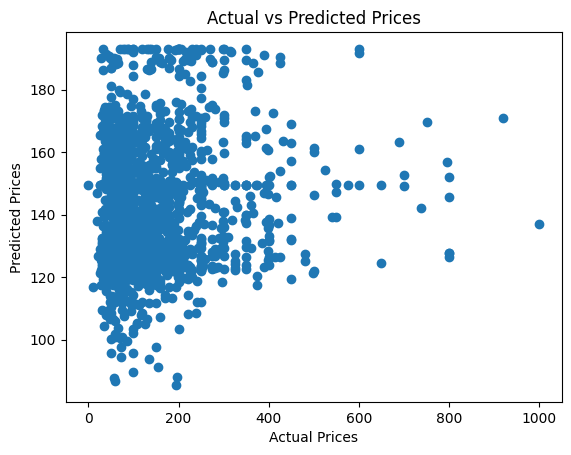

In [19]:
# Visualizing our predictive results
plt.scatter(Y_abnb_test, Y_abnb_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

---

### **Problem 1.2 - Analysis & Discussion**

#### **Model Effectiveness**
The Linear Regression model appears is analyzing a portion of the AirBnB dataset focusing on factors like property popularity, guest ratings, booking frequency, and monthly review frequency (renamed) to predict listing prices. 

**Strengths:**
- The model incorporates multiple relevant variables that logically influence listing prices.
- It uses correlation analysis to understand relationships between variables, which is a solid starting point for predictive modeling.
- However, since the data itself lacks linearity, this supervised learning - linear regression wasn't effective
- I had a very high MSE, `11530.8250` and value of `0.0113` for my R2. Something we want to avoid.

**Conclusion and Limitations:**
- The correlation coefficients between the predictors (X1-X4) and the listing price (Y) are relatively weak, with the strongest being only 0.085718 for booking frequency.
- This suggests that the model might not be very effective in accurately predicting listing prices based solely on these variables.

#### **Complementing Other Tools**
This model serves as a good complement to other tools we've studied in class:

1. **EDA and Statistical Testing:** The correlation matrix provides a foundation for exploratory data analysis, helping identify potential relationships between variables.

2. **AB Testing:** While not directly applicable here, the insights from this model could inform hypotheses for AB tests on pricing strategies.

3. **Sentiment Analysis:** Incorporating sentiment from reviews could enhance the guest rating variable and potentially improve the model's predictive power.

4. **Cohort Analysis:** Segmenting listings into cohorts based on neighborhoods or property types might reveal stronger correlations within specific groups.


#### **Room for Improvement**
To enhance the model's effectiveness, we could:

1. Include more variables like location, amenities, and seasonal trends.
   
2. Apply non-linear modeling techniques to capture complex relationships.
   
3. Incorporate time-series analysis to account for price fluctuations over time.

In conclusion, while this model provides a starting point for understanding AirBnB pricing factors, its current predictive power seems limited. Integrating it with other 
analytical tools and expanding the feature set could lead to more robust insights and predictions.

---

### **B. Unsupervised Learning**

### **Problem 1.3 - Model Development Using K-Means Clustering**

In this section, we will still use the AirBnB dataset from the supervised learning to perform our analysis but with different features.

#### **<mark>Step A</mark> - Features Selection and Justification (*X variable(s)*) with the target, price element (*Y variable*)**

I decided to use the same features and target dataframe from the Linear Regression problem because I wanted to explore what the result will be if I used K-means clustering for the same dataframe.

I will go on to a create copy of:
- `abnb_features_target`
  ...so we do not lose other manipulations above

In [20]:
abnb_features_target_kmc = abnb_features_target
abnb_features_target_kmc

,X1 Property Popularity,X2 Guest Rating,X3 Booking Frequency,X4 Monthly Review Frequency,Y Listing Price ($)
0,10,4.100954,85,0.70,45.0
1,1,3.367600,145,1.00,135.0
2,0,0.000000,65,0.00,150.0
3,5,4.763203,0,0.13,86.0
4,23,3.822591,102,2.29,160.0
...,...,...,...,...,...
10014,4,4.757555,0,0.21,105.0
10015,50,4.344704,188,0.66,125.0
10016,45,3.966214,0,0.98,100.0
10017,2,4.078581,99,0.17,450.0


Before anything, let's make sure our copied dataframe, `abnb_features_target_kmc`, is ready for clustering!
I will:
- Check for missing values and if any fill them with 0s
- Check for NaN values and if any, drop rows with them

The dataframe is already fully numeric (int and float types)

In [21]:
# Checking for missing values
abnb_missing_values = abnb_features_target_kmc.isnull().sum()
print("Missing Values:\n", abnb_missing_values)

Missing Values:
 X1 Property Popularity         0
X2 Guest Rating                0
X3 Booking Frequency           0
X4 Monthly Review Frequency    0
Y Listing Price ($)            0
dtype: int64


No missing values, great!

In [22]:
# Checking for NaN values
print("Number of NaN values in the abnb_features_target_kmc: ", abnb_features_target_kmc.isnull().sum().sum())

# # Dropping rows with NaN values, if any
# data = abnb_features_target_kmc.dropna()

# # Verify if dataframe has been corrected
# print("Number of NaN values in abnb_features_target_kmc: ", abnb_features_target_kmc.isnull().sum().sum())

Number of NaN values in the abnb_features_target_kmc:  0


No NaN values as well!

In [23]:
# Checking if all columns are numeric
abnb_features_target_kmc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9710 entries, 0 to 10018
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   X1 Property Popularity       9710 non-null   int64  
 1   X2 Guest Rating              9710 non-null   float64
 2   X3 Booking Frequency         9710 non-null   int64  
 3   X4 Monthly Review Frequency  9710 non-null   float64
 4   Y Listing Price ($)          9710 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 455.2 KB


Yes they are. 

We are ready for some clustering but similar to linear regression, we need to investigate the correlation between the selected features which is likely to be similar to that of the linear regression.

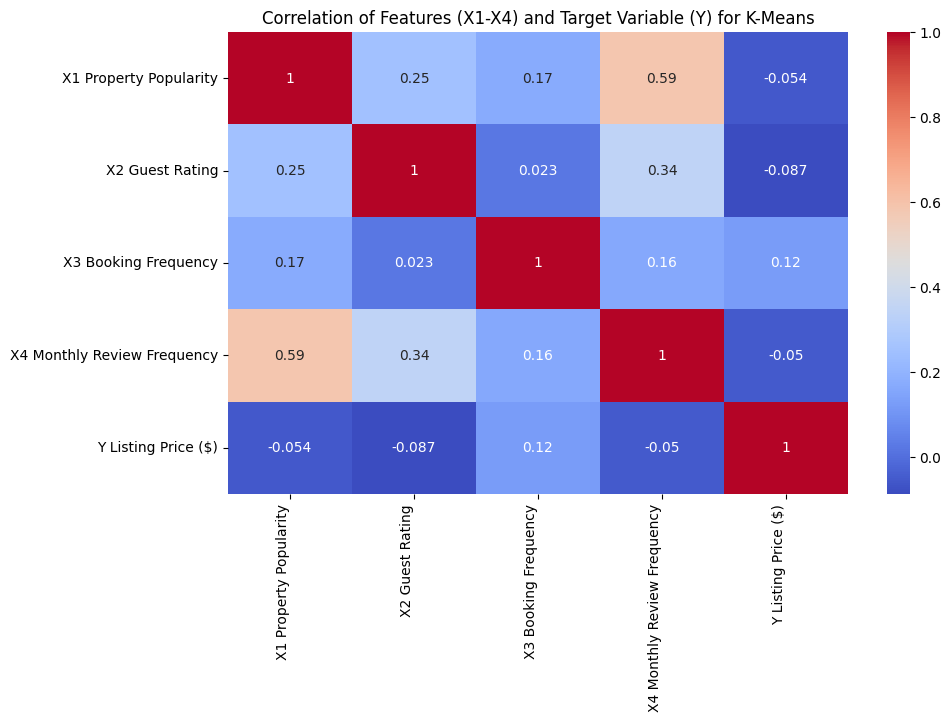

In [24]:
# Creating a heat map to visualize the correlation of the features and the same target variable, price
plt.figure(figsize=(10, 6))
sns.heatmap(abnb_features_target_kmc.corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation of Features (X1-X4) and Target Variable (Y) for K-Means')
plt.show()

From the correlation matrix above, we see that there are no highly correlated features (<0.8 - coefficient threshold) which also means there is no multicollinearity.
Highest coefficient is `0.59` (X1 & X4).

We can proceed with clustering (<mark>that is, using both the elbow and silhouette to see which informs the best k</mark>).

In [25]:
scaler = StandardScaler()
kmc_scaled_data = scaler.fit_transform(abnb_features_target_kmc)

# K-Means Clustering
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Testing clusters with values from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(kmc_scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(kmc_scaled_data, kmeans.labels_))

**i. Elbow Method for Testing with Different Ks**

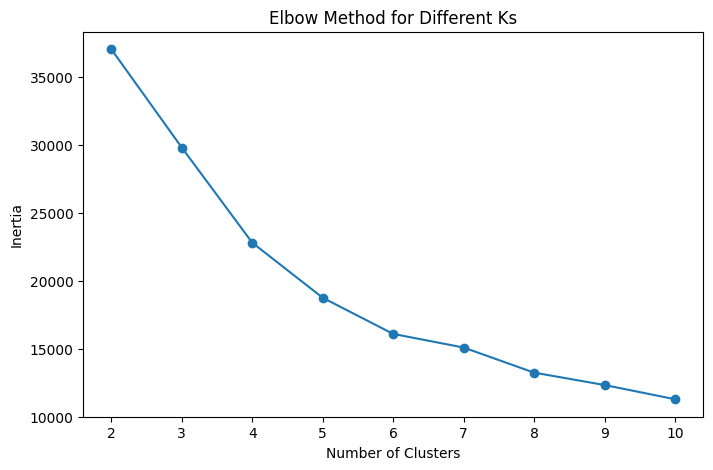

In [26]:
# i - Elbow Method of selecting best K
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Different Ks")
plt.show()

**ii. Silhouette Method for Testing with Different Ks**

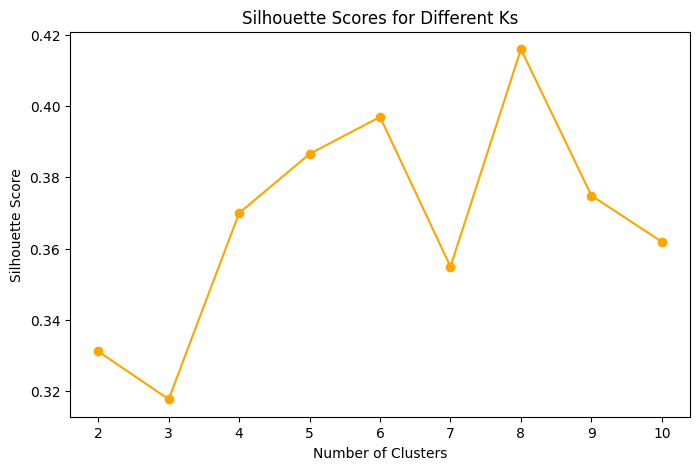

In [27]:
# ii - Silhouette Scores for Determining best K
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different Ks")
plt.show()

From researching, Silhouette Method is often more effective in real-world applications because it evaluates both intra-cluster similarity and inter-cluster dissimilarity.
From my data and the Silhouette plot above, `𝑘 = 8` is a better choice since it maximizes the cluster quality (after k=6, the line graph  slopes down).

So for my K-Means model, I will `k=8`. Let's proceed to calculate.

In [28]:
# Final KMeans Model
optimal_k = 8  # Chosen from Silhouette method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
abnb_features_target_kmc['Cluster'] = kmeans.fit_predict(kmc_scaled_data)

Time to Visualize Clusters

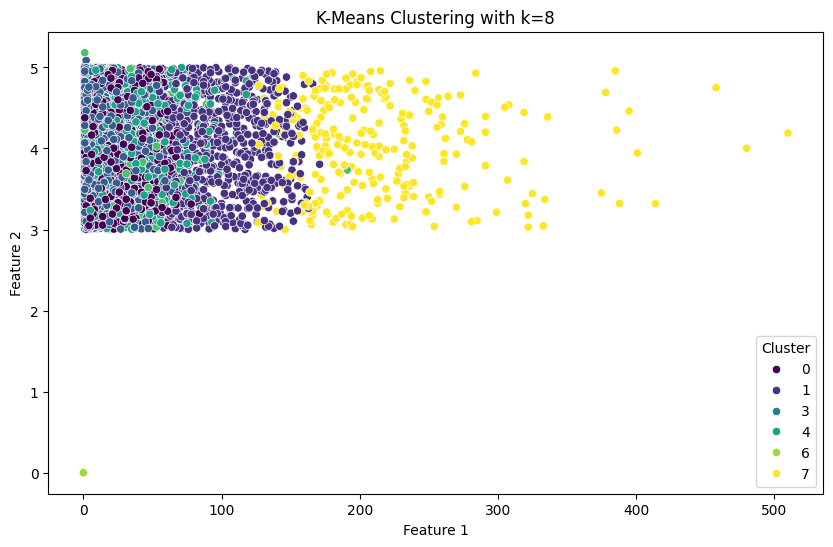

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=abnb_features_target_kmc.iloc[:, 0], y=abnb_features_target_kmc.iloc[:, 1], hue=abnb_features_target_kmc['Cluster'], palette="viridis")
plt.title(f"K-Means Clustering with k={optimal_k}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()

Evaluating the Final Model

In [30]:
print(f"Silhouette Score for k={optimal_k}: {silhouette_score(kmc_scaled_data, abnb_features_target_kmc['Cluster'])}")

Silhouette Score for k=8: 0.4159107765264293


Since we want to see the clusters well, let's use `PCA (Principal Component Analysis)` to reduce the dimension and then do KMeans again (Selecting a new K value)

In [31]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
kmc_scaled_data = scaler.fit_transform(abnb_features_target_kmc)

# Perform PCA by reducing to 2 components for visualization
pca = PCA(n_components=2)
pca_kmc_data = pca.fit_transform(kmc_scaled_data)

Visualizing PCA-reduced data

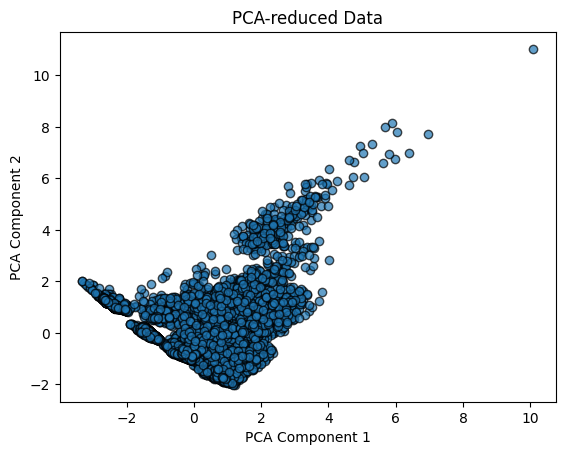

In [32]:
plt.scatter(pca_kmc_data[:, 0], pca_kmc_data[:, 1], alpha=0.7, edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA-reduced Data')
plt.show()

In [33]:
# K-Means Clustering for PCA-reduced data
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Testing clusters with values from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_kmc_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_kmc_data, kmeans.labels_))

**iii. Elbow Method for Testing with Different Ks now for PCA-reduced Data**

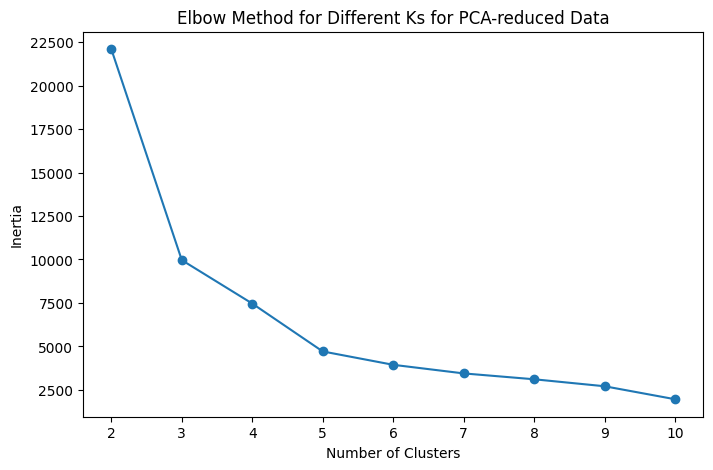

In [34]:
# iii - Elbow Method of selecting best K with PCA-reduced data
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Different Ks for PCA-reduced Data")
plt.show()

**iv. Silhouette Method for Testing with Different Ks for PCA-reduced Data**

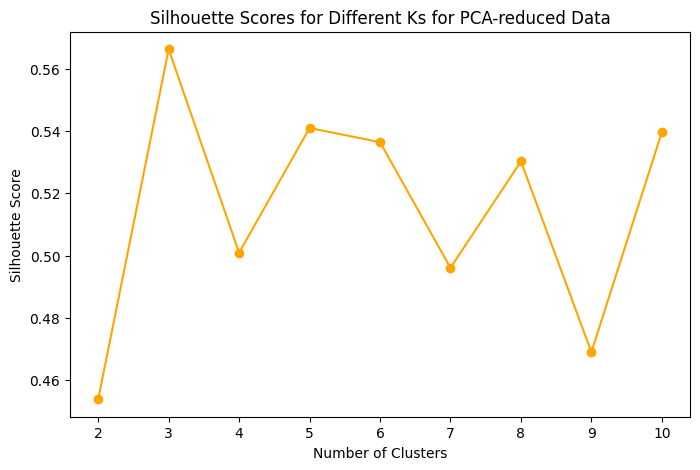

In [35]:
# iv - Silhouette Scores for Determining best K for PCA-reduced data
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different Ks for PCA-reduced Data")
plt.show()

From our Silhouette method, looks like we still have to select `k=3`.

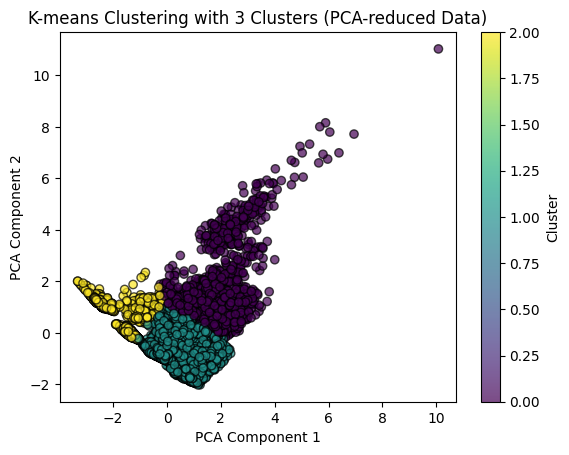

In [36]:
optimal_k = 3  # New chosen number of clusters for PCA-reduced data
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(pca_kmc_data)

# Add cluster labels to the original dataset
abnb_features_target_kmc['Cluster'] = kmeans.labels_

# Visualize the clustered PCA-reduced data
plt.scatter(pca_kmc_data[:, 0], pca_kmc_data[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7, edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-means Clustering with {optimal_k} Clusters (PCA-reduced Data)')
plt.colorbar(label='Cluster')
plt.show()

Extras

C:\Users\micha\AppData\Local\Temp\ipykernel_47460\4118699867.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=abnb_features_target_kmc, palette='Set3')


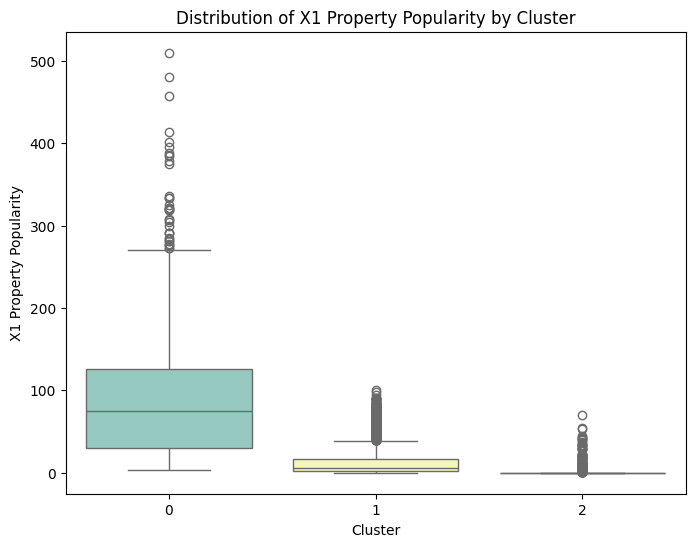

C:\Users\micha\AppData\Local\Temp\ipykernel_47460\4118699867.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=abnb_features_target_kmc, palette='Set3')


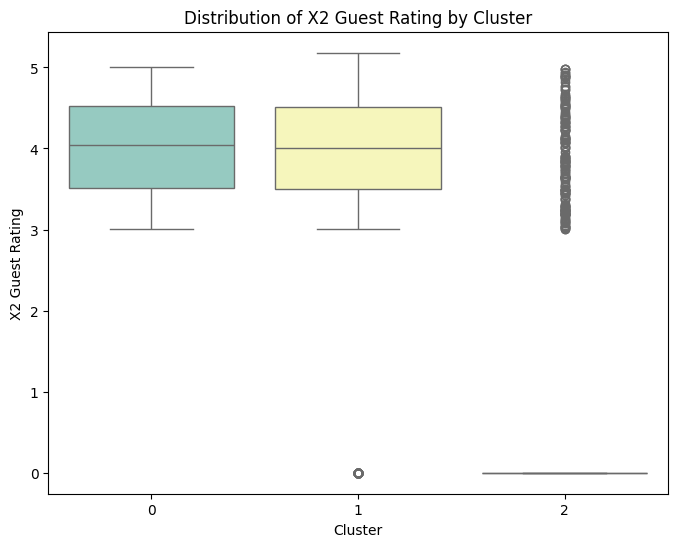

C:\Users\micha\AppData\Local\Temp\ipykernel_47460\4118699867.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=abnb_features_target_kmc, palette='Set3')


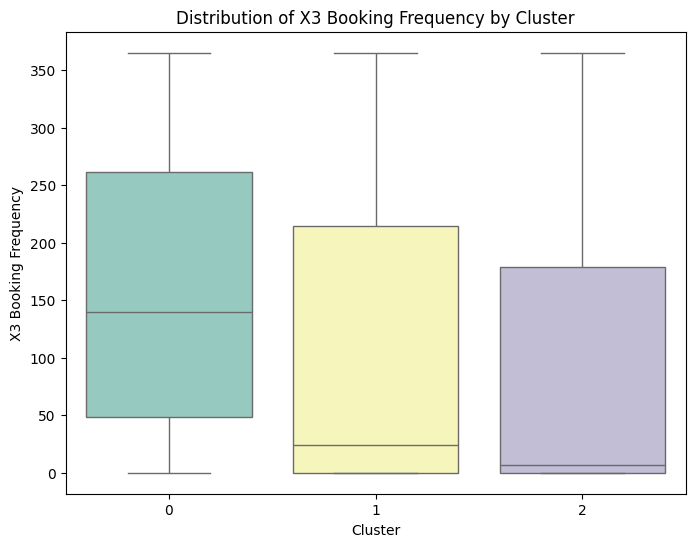

C:\Users\micha\AppData\Local\Temp\ipykernel_47460\4118699867.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=abnb_features_target_kmc, palette='Set3')


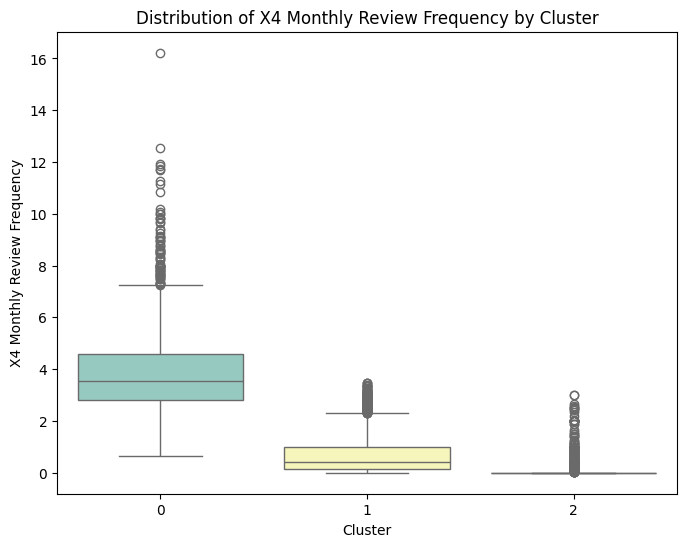

In [37]:
features_to_plot = ['X1 Property Popularity', 'X2 Guest Rating', 'X3 Booking Frequency', 'X4 Monthly Review Frequency']

for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=feature, data=abnb_features_target_kmc, palette='Set3')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

## Insights:

Commenting on the AirBnB clustering analysis and from the correlation matrix, we can see some interesting relationships that help explain the clusters:
- Property Popularity (X1) and Monthly Review Frequency (X4) have a moderate positive correlation (0.59), which makes sense since popular properties likely get more reviews
- Guest Rating (X2) has weak to moderate correlations with other features, suggesting it captures unique information
- Surprisingly, Listing Price (Y) has very weak or slightly negative correlations with all features

Looking at the clustering visualizations:

1. The `first scatter plot` (1st round of KMeans clustering) with k=8 clusters shows:
- A dense concentration of properties in the lower rating ranges (Feature 2: 3-5)
- Clear separation between high-popularity and low-popularity properties (Feature 1)
- The yellow cluster (7) seems to represent high-end properties that are outliers from the main groups
- Multiple overlapping clusters in the dense region suggest similar properties with subtle differences

2. The `PCA-reduced visualization` (2nd round of KMeans clustering) with 3 clusters reveals:
- More distinct cluster separation after dimensionality reduction
- A clear progression from low-value to high-value properties (bottom-left to top-right)
- Some overlap between clusters suggests features that share characteristics

What's particularly interesting is how the clusters don't perfectly align with price (as shown by the weak correlations), suggesting that the AirBnB dataset has features segmented into natural groups based on their characteristics rather than just price listing. This could be valuable for understanding different types of listings and potentially developing targeted strategies for each segment.

The clustering seems to have identified distinct property segments that could represent different market positions - from budget accommodations, price setting to premium experiences - based on the combination of popularity, ratings, booking patterns, and review activity.

---

Now, looking at the provided box plots:

1. Property Popularity (X1):
- Cluster 4 shows significantly higher popularity (median around 200, with outliers up to 500)
- Cluster 5 has moderate to low popularity (median around 25-50)

2. Guest Rating (X2):
- Remarkably consistent ratings across all clusters (mostly between 3.5-4.5)
- Cluster 2 shows an interesting pattern with many outliers at the 5.0 rating
- All clusters maintain relatively high ratings overall

3. Booking Frequency (X3):
- Cluster 0 shows the highest booking frequency (median around 300)
- Clusters 1 and 2 show low booking frequencies

4. Monthly Review Frequency (X4):
- Cluster 4 shows the highest review frequency (median around 4-5, with outliers up to 16)
- Clusters 0, 1, and 2 have very low review frequencies (median below 1)

Key Insights:
1. Despite variations in popularity and booking frequency, guest ratings remain consistently high across clusters
2. Cluster 4 properties seem to be the most engaged with the AirBnB service (high popularity and review frequency)
3. Clusters 1 and 2 consistently show lower metrics across most dimensions

This clustering suggests different types of properties:
- Cluster 4: "High Engagement" (high popularity, high reviews)
- Cluster 0: "Reliable Patronizers" (high booking frequency but lower reviews)

### **Problem 1.4 - Analysis & Discussion**

The unsupervised learning analysis of the AirBnB dataset reveals several interesting insights about the relationships between various factors and listing prices.
I will discuss the effectiveness, limitations, and complementary aspects of this approach.

### **Effectiveness of the Model**

The unsupervised learning model, particularly the correlation analysis, provides valuable insights into the relationships between different variables:

1. **Correlation Identification**: The model effectively identifies correlations between various factors such as property popularity, guest rating, booking frequency, and monthly review frequency with the listing price.

2. **Data Visualization**: The correlation matrix offers a clear visual representation of these relationships, making it easy to quickly identify strong and weak correlations and make deductions.

3. **Feature Importance**: By analyzing the correlations, we can determine which features have the most significant impact on listing prices, helping to prioritize factors for further analysis or decision-making.

### **Limitations of the Model**

Despite its strengths, the unsupervised learning approach has some limitations:

1. **Lack of Causality**: While correlations are identified, the model doesn't establish causality between variables. For example, a weak negative correlation between guest rating and listing price doesn't necessarily mean that lower prices cause higher ratings.

2. **Oversimplification**: The model may oversimplify complex relationships in the data. Real-world pricing dynamics in the short-term rental market are likely more nuanced than simple linear correlations.

3. **Limited Predictive Power**: Unlike supervised learning models, this unsupervised approach doesn't provide direct predictions or a clear decision boundary for pricing strategies (extra layers needed).

### **Complementing Other Tools**

This unsupervised learning approach complements other tools and techniques studied in class:

1. **Feature Selection**: The correlation analysis can inform feature selection when it comes to AB Testing of features too. Helping to identify the most relevant variables for price prediction.

2. **Exploratory Data Analysis**: It serves as an excellent tool for initial data exploration, providing insights that can guide further, more sophisticated analyses.

3. **Hypothesis Generation**: The correlations observed can lead to hypothesis generation, which can be tested using more advanced statistical methods or machine learning models.

In conclusion, while this unsupervised learning approach has limitations in terms of predictive power and causal inference, it serves as a valuable tool for initial data exploration and hypothesis generation.

---

## **2. Compare & Contrast**

The results developed above can be compared with several frameworks we've studied in class: inference testing, clustering and thematic analysis, design justice, equity-centered design, and futures thinking. Two key themes emerge - `data` and `features/components` through these lenses.

In inference and A/B testing, we examine how features interact with one another. Clustering and thematic analysis help us understand user journeys and interactions with services, grouping similar data types to identify patterns. This was evident when we were performing statistical analysis, where we evaluated values to make inferences about user behavior and system performance.

Design justice principles help us understand who we're solving problems for, especially in automated systems. When analyzing values and thresholds (like 0.05 - confidence levels or 0.8 - correlation threshold), we must consider how many people these decisions affect. This connects to equity-centered design, as the inferences we make from different features influence decisions that impact users and the products we build.

Relating this to futures thinking, our analysis of trends and patterns (such as views and ratings) helps predict how new products might be received. This applies the concept of horizon scanning – putting ourselves in customers' shoes to anticipate their reactions and ratings, considering performance indices and other metrics.

The tools we've learned across DESIGNTK 520, 530, and 540 connect seamlessly: 520 focuses on field research and problem identification, 530 applies technological solutions to these problems, and 540 addresses the social impact and ethical considerations. These courses form a comprehensive approach to technology development, sitting at the intersection of the Venn diagram where technical innovation meets social responsibility.

This interconnected framework ensures that our solutions are not just technically sound but also socially conscious and future-oriented.


---

## **3. Stretch**

### **A. Random Forest**

#### **<mark>Step C-E</mark> (Similar to Linear Regression)**

In [38]:
# Training the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_abnb_train, Y_abnb_train)

# Making predictions
Y_abnb_pred_rf = rf_model.predict(X_abnb_test)

In [39]:
# Evaluating the model
MSE_rf = mean_squared_error(Y_abnb_test, Y_abnb_pred)
R2_rf= r2_score(Y_abnb_test, Y_abnb_pred_rf)

print(f'Mean Squared Error: {MSE_rf}')
print(f'R2 Score: {R2_rf}')

Mean Squared Error: 11530.825097301471
R2 Score: -0.08012286694287396


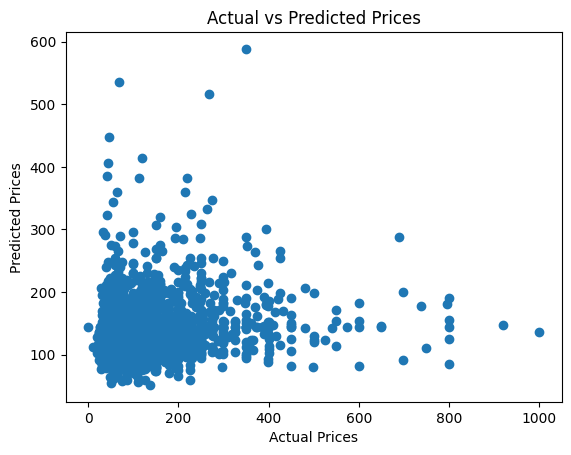

In [40]:
# Visualizing our predictive results
plt.scatter(Y_abnb_test, Y_abnb_pred_rf)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

Unfortunately, our Random Forest method didn't work as it yielded.
It resulted in an also very high MSE, `11530.8`, and the R2 was negative, `-0.0884`. 

Which also means that even the Random Forest model didn't work and wasn't efficient in predicting price listinbgs.

### **B. Logistic Regression - Classification**

To perform my classification, I would:
- Select the new target variable as `Room Type` from our AirBnB dataset to create a new features and target dataframe for our classification
- Recode the unique room types as 0, 1 etc so we can do a classification

But first, let's get the unique room list

In [41]:
# Getting the unique room type elements
unique_room_types = the_airbnb_data['Room Type'].unique()
unique_room_types

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

From the above result, some form of renaming of table data values need to be performed as there are some redundancies

In [42]:
# Renaming the table data values of Room Type to have just 1-Private Room, 2-Entire Home/Apt and 3-Shared Room
# Creating a mapping for room type replacements
room_type_mapping = {
    'Private': 'Private Room',
    'Private room': 'Private Room',
    'PRIVATE ROOM': 'Private Room',
    'Entire home/apt': 'Home/Apartment',
    'home': 'Home/Apartment',
    '   Shared room      ': 'Shared Room',
    'Shared room': 'Shared Room'
}

# Replacing the values in the 'Room Type' column
the_airbnb_data['Room Type'] = the_airbnb_data['Room Type'].replace(room_type_mapping)

# Verifying the changes
unique_room_types = the_airbnb_data['Room Type'].unique()
unique_room_types

array(['Private Room', 'Home/Apartment', 'Shared Room'], dtype=object)

Now, let's recode the 3 new types of rooms into [-1,0,1] to aid in our classification

In [43]:
# Renaming the table data values of Room Type to have just 1-Private Room, 2-Entire Home/Apt and 3-Shared Room
# Creating a mapping for room type replacements
room_type_mapping = {
    'Private Room': -1,
    'Home/Apartment': 0,
    'Shared Room': 1
}

# Replacing the values in the 'Room Type' column
the_airbnb_data['Room Type'] = the_airbnb_data['Room Type'].replace(room_type_mapping)

# Verifying the changes
unique_room_types = the_airbnb_data['Room Type'].unique()
the_airbnb_data.head(10)

C:\Users\micha\AppData\Local\Temp\ipykernel_47460\1000141143.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  the_airbnb_data['Room Type'] = the_airbnb_data['Room Type'].replace(room_type_mapping)


,Listing ID,Listing Name,Host ID,Host Name,Neighborhood,Coordinates,Room Type,Y Listing Price ($),X1 Property Popularity,Last Review,X4 Monthly Review Frequency,X3 Booking Frequency,X2 Guest Rating,Number of Stays,5-Star Rating,Listing Added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",-1,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",0,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",0,150.0,0,NaT,0.00,65,0.000000,0.0,0.000000,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",0,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",-1,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23
5,271954,Beautiful brownstone apartment,1423798,Aj,"Manhattan, Greenwich Village","(40.73388, -73.99452)",0,150.0,203,2019-06-20,2.22,300,4.478396,243.6,0.743500,2018-12-15
6,33473567,Hamilton Heights Full Floor Garden Apt,33388853,Christine,"Manhattan, Harlem","(40.8309, -73.94308000000002)",0,200.0,0,NaT,0.00,219,0.000000,0.0,0.000000,2018-05-05
7,14218742,Luxury/3bedroom/3bthrm/Privateprkng/beach/rstrnts,78824908,Ilona,"Brooklyn, Sheepshead Bay","(40.58531, -73.93811)",0,224.0,2,2018-06-22,0.08,353,4.091228,2.4,0.690393,2017-12-17
8,15125599,Beautiful One Bedroom Apartment Near Central Park,3191545,Kyle,"Manhattan, Theater District","(40.761, -73.98522)",0,169.0,5,2017-06-25,0.15,365,3.562947,6.0,0.704538,2016-12-20
9,24553891,Enjoy all of Manhattan. Big Apple! A Mini-MOMA!,68557372,Shannon,"Manhattan, Harlem","(40.80667, -73.95182)",0,75.0,8,2019-04-24,0.66,9,4.695769,9.6,0.750073,2018-10-19


---

### <mark>**NB:**</mark>

Unfortunately, I couldn't complete the full Stretch part (specifically the *Logistic Regression - Classification* part). Did about 70%. Hopefully, the beginning would speak my intuition and where I was headed. I would explore it on my own time as well.